# Star Cluster Identifier
# 7th Inter IIT Tech Meet - IIT Bombay 
## Submission By - IIT Bhilai
### Group Members:
   1. Ahtisham Ali Ansari
   2. Anuj Singh
   3. Arjun Singh Kushwaha
   4. Pintu Kumar 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
% matplotlib inline

## Data Cleaning and Pre-processing
1. Data file was opened using a text editor and comments were removed.
2. We convert the txt file to csv file below.

In [30]:
# converting txt file to CSV format
with open('Dataset.txt') as infile, open('datas.csv', 'w') as outfile:
    for line in infile:
        outfile.write(" ".join(line.split()).replace(' ', ','))
        outfile.write("\n") # trailing comma shouldn't matter      

3. Column names were added to the csv (Column 1 was named 1, Column 2 as 2 and so on till 37)

In [31]:
df = pd.read_csv('data.csv')

In [32]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,37
0,6954.4673,1738.9973,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,0.9999,0.0085,1,1,-1.0,205.524050,28.341480,R0000001,1
1,7111.1323,1756.4988,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,0.9991,-0.0041,1,1,-1.0,205.522096,28.341672,R0000002,1
2,6884.0669,1784.6356,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,0.9997,-0.0023,1,1,-1.0,205.524928,28.341980,R0000003,1
3,6604.6484,1786.4238,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,1.0000,0.0086,1,1,-1.0,205.528412,28.342000,R0000004,1
4,7284.2275,1819.0413,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,1.0000,0.0000,99,99,-1.0,205.519938,28.342358,R0000005,1


In [33]:
data1 = df.copy(deep=True)
data1['v'] = data1['21']
data1['ci'] = data1['15'] - data1['v']

In [34]:
data1.head()

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,v,ci
0,6954.4673,1738.9973,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0085,1,1,-1.0,205.524050,28.341480,R0000001,1,17.9620,-117.9619
1,7111.1323,1756.4988,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,-0.0041,1,1,-1.0,205.522096,28.341672,R0000002,1,18.9495,-118.9494
2,6884.0669,1784.6356,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,-0.0023,1,1,-1.0,205.524928,28.341980,R0000003,1,17.7609,-117.7608
3,6604.6484,1786.4238,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0086,1,1,-1.0,205.528412,28.342000,R0000004,1,18.4991,-118.4990
4,7284.2275,1819.0413,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0000,99,99,-1.0,205.519938,28.342358,R0000005,1,15.7478,-115.7477


In [35]:
# Removing the stars fainter than mF606W = 22
data = data1[data1['21']<22]
print(data1.shape)
print(data.shape)

(199621, 39)
(69571, 39)


In [36]:
# Removing the entries for which the Membership Probability is -1.0 
stars = data[data['33']!=-1.0]

# Removing the entries where there is -99.9999 in B or V
stars = stars[stars['15']!=-99.9999]
stars = stars[stars['21']!=-99.9999]

# Converting apparent magnitude to Absolute Magnitude
d = 10400
stars['v'] = stars['v']-(5*math.log10(d/10))

print('Values of Calibrated Magnitude of v -\n')
print('\tMaximum :',stars['v'].max())
print('\tMinimum :',stars['v'].min())

Values of Calibrated Magnitude of v -

	Maximum : 6.9147333035060985
	Minimum : -2.8344666964939016


In [37]:
print('Values of Calibrated Magnitude of B-V -\n')
print('\tMaximum :',stars['ci'].max())
print('\tMinimum :',stars['ci'].min())

Values of Calibrated Magnitude of B-V -

	Maximum : 4.4712
	Minimum : -0.6964000000000006


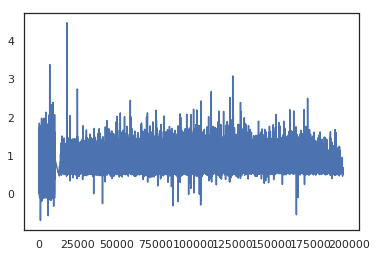

In [38]:
plt.plot(stars['ci'])

/home/arjun/learning.python/.venv/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/arjun/learning.python/.venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


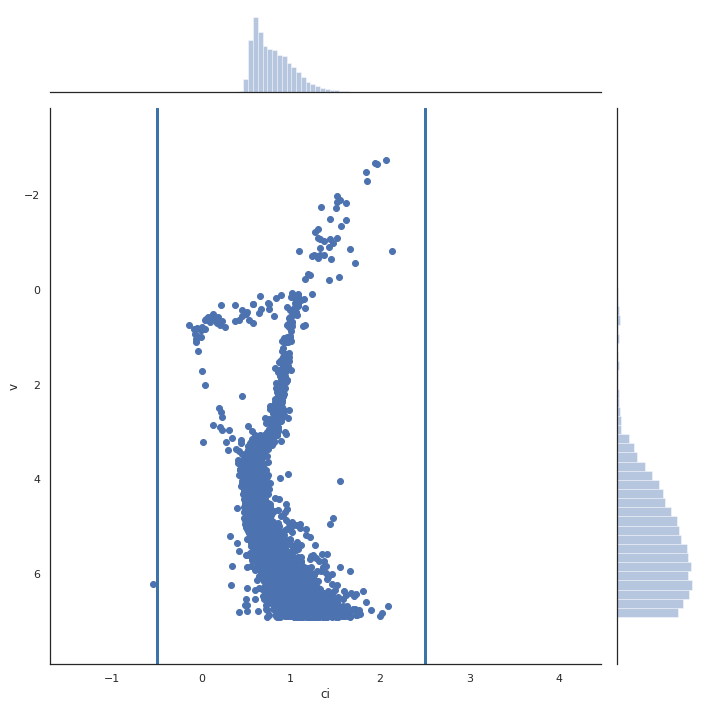

In [39]:
sns.set(style="white")

xlim = (min(stars['ci']) - 1, max(stars['ci']))
ylim = (max(stars['v']) + 1, min(stars['v']) - 1) # inverts y-axis
x="ci"
y="v"
ax = sns.jointplot(x, y, data=stars.sample(int(10e3)),xlim=xlim, ylim=ylim,size=10, ratio=6, stat_func=None)

for x, y in [([2.5, 2.5], ylim), ([-.5, -.5], ylim), (xlim, [18, 18]), (xlim, [-16, -16])]:
    ax.ax_joint.plot(x, y, sns.xkcd_rgb["flat blue"], lw=3)

<IPython.core.display.Javascript object>


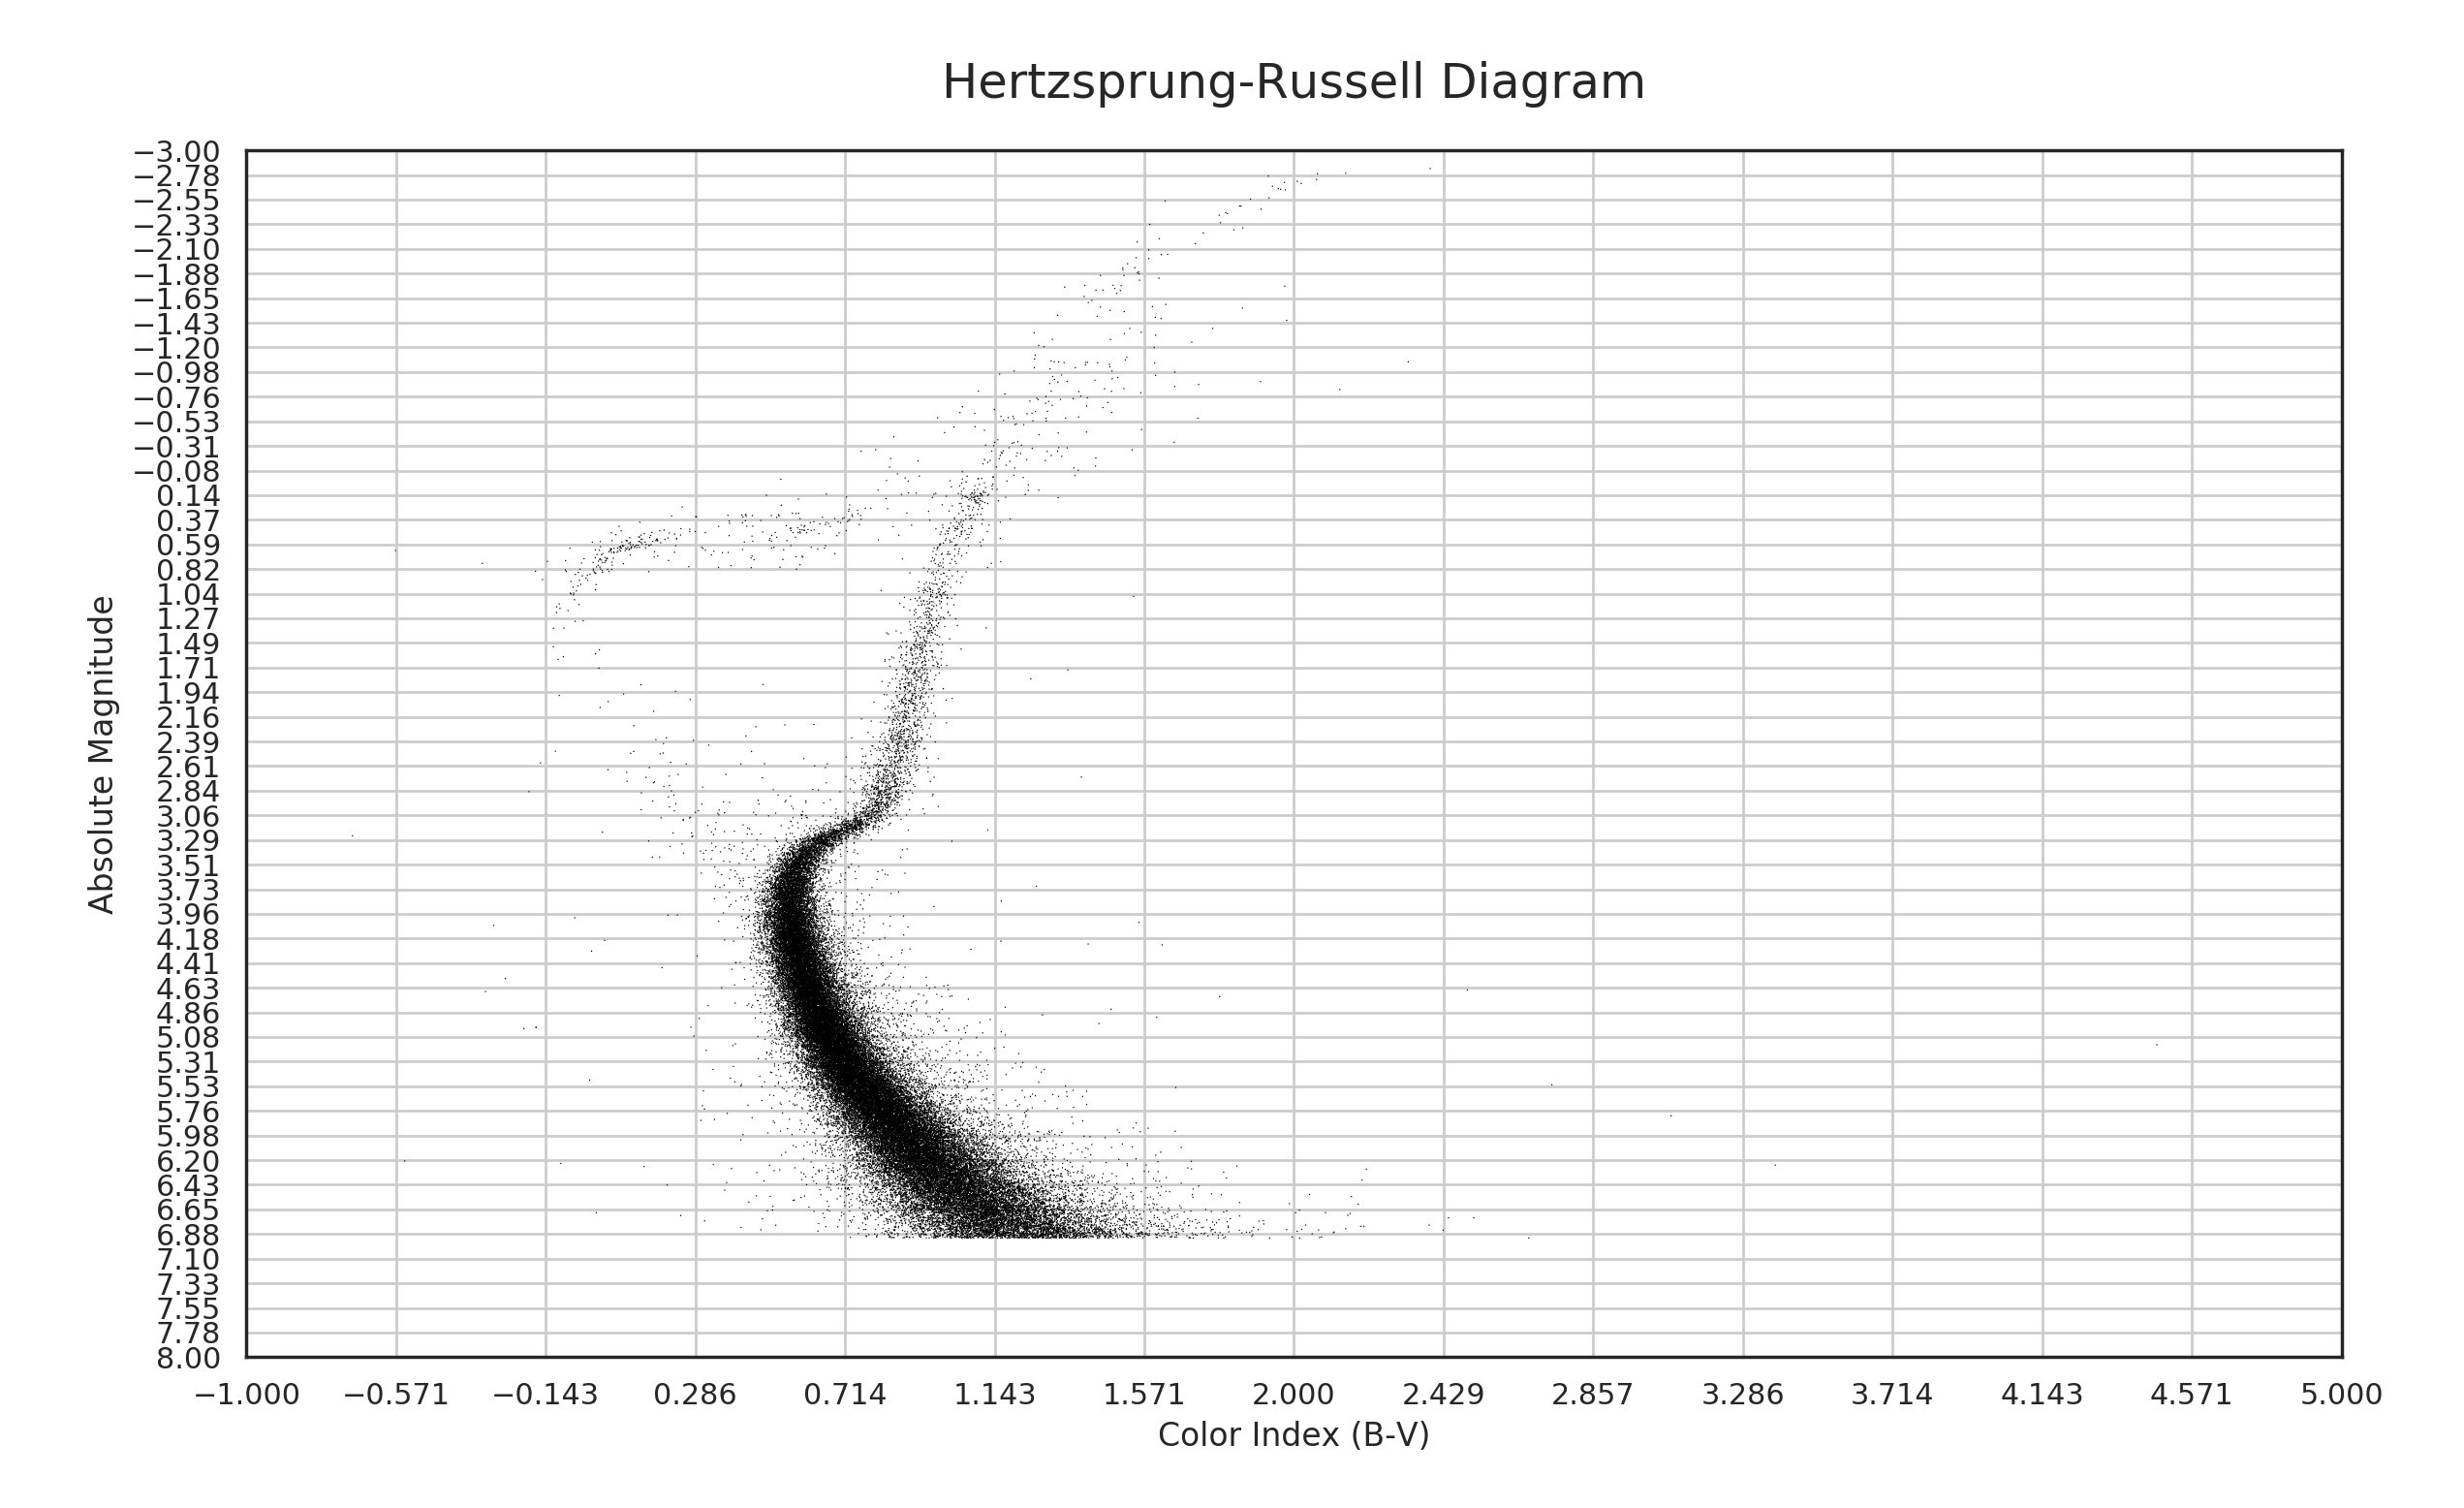

In [40]:
%matplotlib notebook
fig = plt.figure(figsize=(6, 8),dpi=72)
ax = fig.add_axes([.1, .1, .85, .8])
ax.set_title('Hertzsprung-Russell Diagram', fontsize=18)
ax.title.set_position([.5, 1.03])
ax.set_xlabel('Color Index (B-V)')
ax.set_ylabel('Absolute Magnitude')

ax.scatter(stars['ci'],stars['v'],marker='.',s=[1] * len(stars),facecolors='black',linewidth=0)
ax.set_xlim(-0.7, 4)
ax.set_xticks(np.linspace(-1, 5, 15, endpoint=True))
ax.set_ylim(7, -3)
ax.set_yticks(np.linspace(8, -3, 50, endpoint=True))
plt.grid()

In [13]:
abs_tp = 3.4
print('Turn Off Point (Apparent) = ',abs_tp + (5*math.log10(d/10)))

Turn Off Point (Apparent) =  18.485166696493902


### Calculating the age of the cluster

#### Formulas Used :
tage = tsun (Lsun x M)/(L x Msun)  
where,  
tage = age of the cluster  
tsun = age of sun  
Lsun = luminosity of sun  
L = luminosity of cluster star  
M = Mass of the cluster star  
Msun = Mass of the sun  

In [14]:
lsun = 3.828 * 1e26
l0 = 3.0128 * 1e28

rl = (lsun/l0)* math.pow(10,0.4*abs_tp)
rm = pow((1/rl),3.8)

age = 1e10*(rl*rm)
print('Age of the cluster = ',age)

Age of the cluster =  316807493873.2696


In [47]:
print('Number of Subgiants : ',stars[(stars['ci'] > 0.714) & (stars['ci']<1.143) & (stars['v']<5.76) & (stars['v'] > 4.63)].shape[0])

Number of Subgiants :  9344
